In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [70]:
reviews_df = pd.read_csv('../data/reviews.csv')
books_df = pd.read_csv('../data/books.csv')

In [3]:
reviews_df.sort_values(by='book_id').head(5)

,book_id,user_id,user_rating,user_review
432531,1,34621,5,None
518910,1,40749,5,None
19180,1,112687,4,None
767585,1,6525904,5,None
475564,1,3536464,5,None


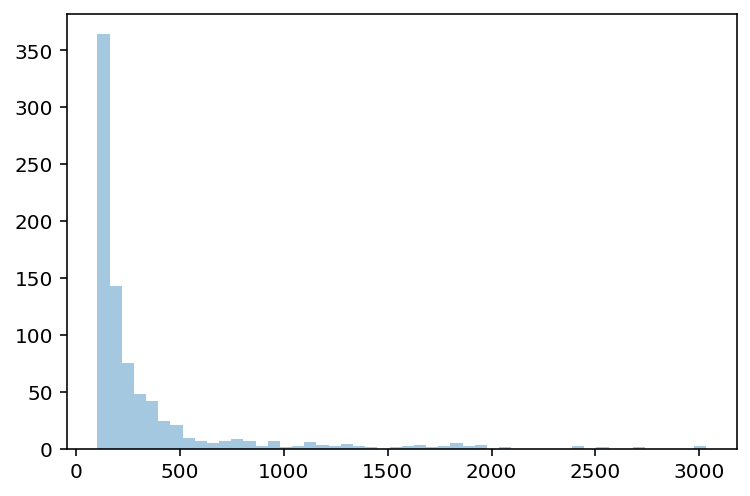

In [10]:
books_popularity = reviews_df.groupby(['book_id']).count()['user_id']
sns.distplot(books_popularity[books_popularity > 100].values, kde=False)

In [18]:
np.sum(books_popularity > 1)

22936

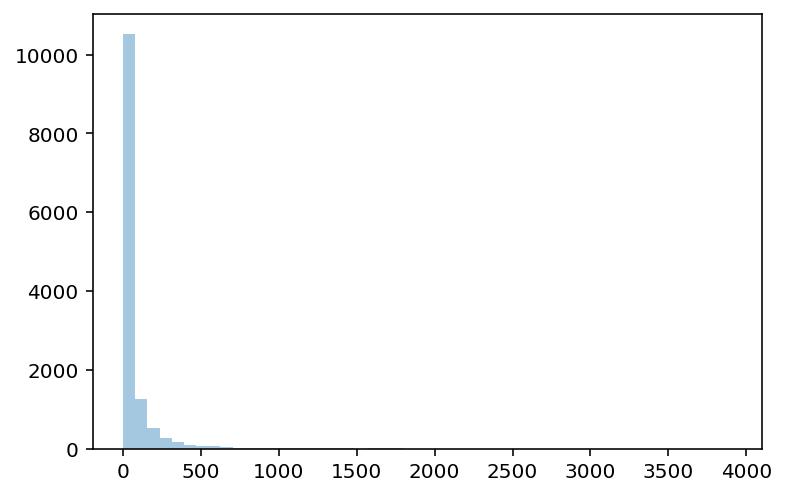

In [12]:
reviews_per_user = reviews_df.groupby(['user_id']).count()['book_id']
sns.distplot(reviews_per_user.values, kde=False)

In [33]:
reviews_df[reviews_df['book_id'] == 10]

,book_id,user_id,user_rating,user_review
39897,10,1627164,4,None
150382,10,4190,5,"yes, i had to post these. you can read them ea..."
153499,10,4674,5,None
155399,10,5,4,Come-on! It's Harry Potter!
170956,10,550,5,No explanation needed......
193903,10,689,5,None
199722,10,7818,5,Who can resist Harry? So sad the magic is comi...


In [72]:
books_df.head()

,id,best_id,title,author,description,year,num_pages,format,media_type,language,image_url,average_rating,rating_dist,ratings_count,text_reviews_count,shelves
0,1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,The war against Voldemort is not going well; e...,2005.0,652.0,Paperback,book,eng,https://i.gr-assets.com/images/S/compressed.ph...,4.57,5:1598220|4:570051|3:163397|2:25942|1:10453|to...,2368063,38135,"{""fantasy"": 46663, ""favorites"": 39215, ""young-..."
1,10,10,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,"Six years of magic, adventure, and mystery mak...",2005.0,3342.0,Hardcover,book,eng,https://i.gr-assets.com/images/S/compressed.ph...,4.73,5:24710|4:4399|3:1086|2:217|1:267|total:30679,30679,939,"{""favorites"": 373, ""fantasy"": 283, ""fiction"": ..."
2,10000191,22319275,Yellow Crocus,Laila Ibrahim,Mattie was never truly mine. That knowledge mu...,2010.0,229.0,Paperback,book,eng,https://s.gr-assets.com/assets/nophoto/book/11...,4.30,5:29248|4:21779|3:7066|2:1349|1:530|total:59972,59972,5434,"{""historical-fiction"": 894, ""fiction"": 377, ""k..."
3,10002296,10002296,Wildflower Hill,Kimberley Freeman,Forced to take her life in a new direction whe...,2010.0,524.0,Paperback,book,en-US,https://i.gr-assets.com/images/S/compressed.ph...,4.08,5:4206|4:5222|3:2138|2:361|1:113|total:12040,12040,1402,"{""historical-fiction"": 211, ""fiction"": 158, ""f..."
4,10006,10006,Oracle Night,Paul Auster,The discovery of a mysterious notebook turns a...,2004.0,245.0,NaN,book,eng,https://i.gr-assets.com/images/S/compressed.ph...,3.79,5:3023|4:5611|3:3745|2:821|1:164|total:13364,13364,810,"{""fiction"": 346, ""favorites"": 91, ""rory-gilmor..."


In [73]:
books_df.language.unique()

array(['eng', 'en-US', nan, 'en-GB', 'nl', 'per', 'spa', 'fre', 'ara',
       'en-CA', 'pol', 'mul', 'ind', 'por', 'ger', 'en', 'rus', 'pes',
       'swe', 'jpn', 'enm', '--', 'ita', 'nor', 'tur', 'ira', 'vie'],
      dtype=object)

In [74]:
books_df.media_type.unique()

array(['book', nan, 'periodical', 'not a book', 'article'], dtype=object)

In [75]:
books_df.format.unique()

array(['Paperback', 'Hardcover', nan, 'Kindle Edition', 'ebook',
       'Mass Market Paperback', 'Audio CD', 'Slipcased Hardcover',
       'Audio Cassette', 'Comics', 'Board Book', 'paperback',
       'Trade Paperback', 'Box Set', 'Paper back', 'Leather Bound',
       'Library Binding', 'Audible Audio', 'Nook', 'MP3 CD', 'Audiobook',
       'Comic Book', 'Broschiert', 'Science Fiction Book Club Omnibus',
       'Audio', 'Unknown Binding', 'رقعی', 'Paperback ', 'paper',
       'Slipcase Hardcover', 'Novelty Book', 'Softcover',
       'Paperback and online', 'Board book', 'Mass Market Paperback ',
       'Spiral-bound', 'Boxed Set', 'Loose-Leaf', 'コミック', 'Trade Paper',
       'pocket', 'Graphic Novel', 'Hardcover / گالینگور - وزیری'],
      dtype=object)

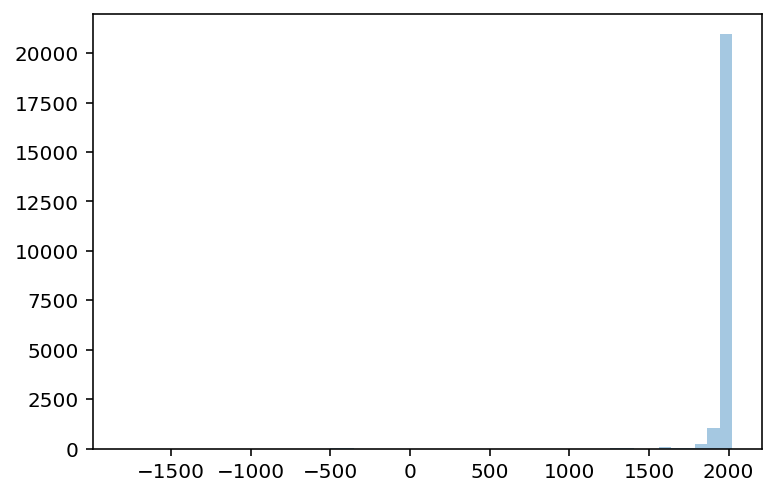

In [88]:
books_years = books_df.year
sns.distplot(books_years.values, kde=False)


In [91]:
books_df[ books_df.media_type == 'book']

,id,best_id,title,author,description,year,num_pages,format,media_type,language,image_url,average_rating,rating_dist,ratings_count,text_reviews_count,shelves
0,1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,The war against Voldemort is not going well; e...,2005.0,652.0,Paperback,book,eng,https://i.gr-assets.com/images/S/compressed.ph...,4.57,5:1598220|4:570051|3:163397|2:25942|1:10453|to...,2368063,38135,"{""fantasy"": 46663, ""favorites"": 39215, ""young-..."
1,10,10,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,"Six years of magic, adventure, and mystery mak...",2005.0,3342.0,Hardcover,book,eng,https://i.gr-assets.com/images/S/compressed.ph...,4.73,5:24710|4:4399|3:1086|2:217|1:267|total:30679,30679,939,"{""favorites"": 373, ""fantasy"": 283, ""fiction"": ..."
2,10000191,22319275,Yellow Crocus,Laila Ibrahim,Mattie was never truly mine. That knowledge mu...,2010.0,229.0,Paperback,book,eng,https://s.gr-assets.com/assets/nophoto/book/11...,4.30,5:29248|4:21779|3:7066|2:1349|1:530|total:59972,59972,5434,"{""historical-fiction"": 894, ""fiction"": 377, ""k..."
3,10002296,10002296,Wildflower Hill,Kimberley Freeman,Forced to take her life in a new direction whe...,2010.0,524.0,Paperback,book,en-US,https://i.gr-assets.com/images/S/compressed.ph...,4.08,5:4206|4:5222|3:2138|2:361|1:113|total:12040,12040,1402,"{""historical-fiction"": 211, ""fiction"": 158, ""f..."
4,10006,10006,Oracle Night,Paul Auster,The discovery of a mysterious notebook turns a...,2004.0,245.0,NaN,book,eng,https://i.gr-assets.com/images/S/compressed.ph...,3.79,5:3023|4:5611|3:3745|2:821|1:164|total:13364,13364,810,"{""fiction"": 346, ""favorites"": 91, ""rory-gilmor..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22493,9995135,9995135,The Darkest Seduction (Lords of the Underworld...,Gena Showalter,"At long last, New York Times bestselling autho...",2012.0,504.0,Mass Market Paperback,book,eng,https://i.gr-assets.com/images/S/compressed.ph...,4.35,5:13130|4:7262|3:3048|2:597|1:170|total:24207,24207,1253,"{""paranormal-romance"": 632, ""paranormal"": 513,..."
22494,99955,99955,"Common Sense, The Rights of Man and Other Esse...",Thomas Paine,Paine's daring prose paved the way for the Dec...,1776.0,416.0,Paperback,book,eng,https://i.gr-assets.com/images/S/compressed.ph...,4.14,5:6111|4:4950|3:2778|2:486|1:117|total:14442,14442,143,"{""philosophy"": 356, ""history"": 261, ""non-ficti..."
22495,9998,9998,The Woman in the Dunes,Kōbō Abe,"The Woman in the Dunes, by celebrated writer a...",1962.0,241.0,Paperback,book,eng,https://i.gr-assets.com/images/S/compressed.ph...,3.91,5:6365|4:8696|3:4616|2:1266|1:358|total:21301,21301,1701,"{""fiction"": 825, ""japan"": 533, ""japanese"": 421..."
22496,9998705,9998705,"Flash and Bones (Temperance Brennan, #14)",Kathy Reichs,"FLASH! Illuminated by lightning, a lifeless hu...",2011.0,278.0,Hardcover,book,eng,https://i.gr-assets.com/images/S/compressed.ph...,3.87,5:5292|4:7580|3:5347|2:964|1:146|total:19329,19329,1297,"{""mystery"": 572, ""kathy-reichs"": 313, ""crime"":..."


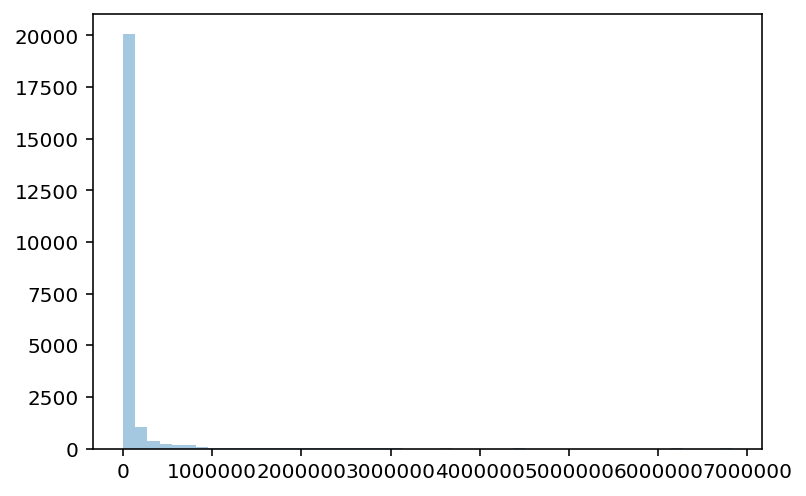

In [95]:
sns.distplot(books_df.ratings_count.values, kde=False)

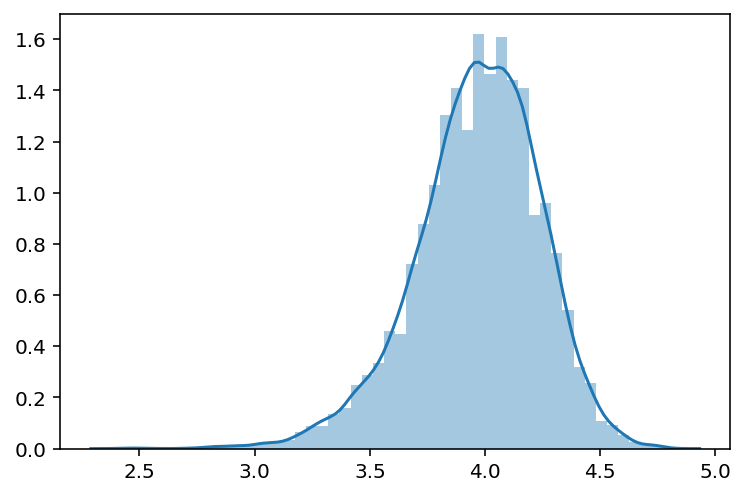

In [96]:
sns.distplot(books_df.average_rating.values, kde=True)

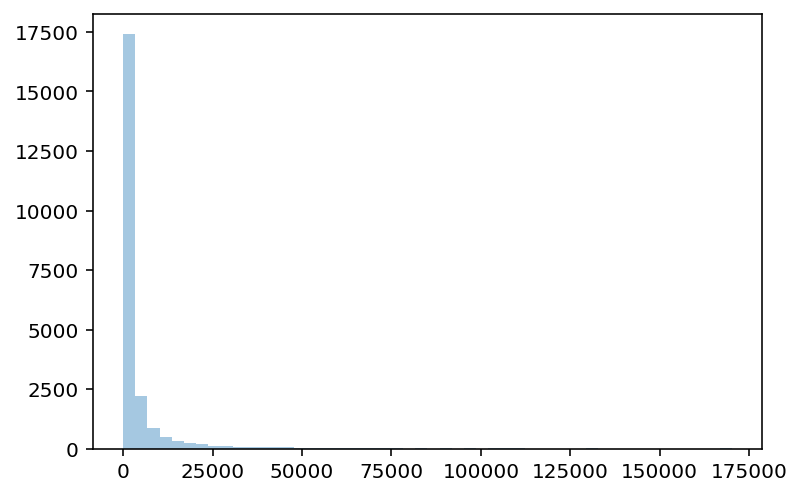

In [97]:
sns.distplot(books_df.text_reviews_count.values, kde=False)

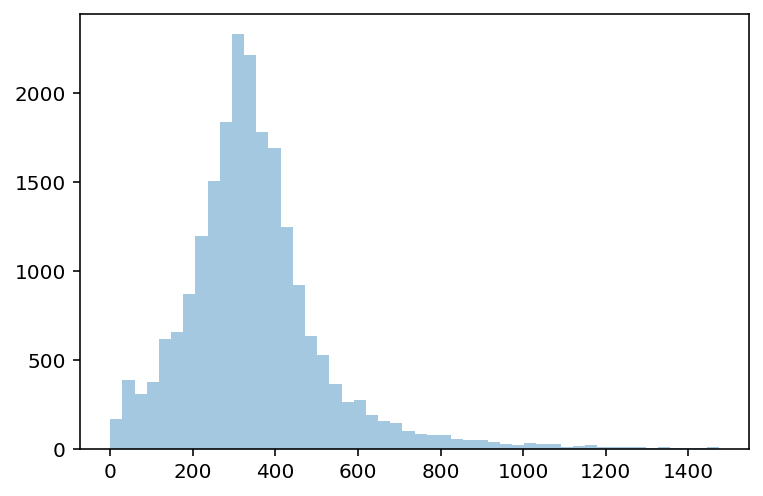

In [102]:
sns.distplot(books_df.num_pages[books_df.num_pages <1500].values, kde=False)

In [104]:
books_df.describe()

,id,best_id,year,num_pages,average_rating,ratings_count,text_reviews_count
count,2.249800e+04,2.249800e+04,22442.000000,21416.000000,22498.000000,2.249800e+04,22498.000000
mean,7.099017e+06,7.701537e+06,1985.832279,351.738233,3.967309,9.139864e+04,4116.356654
std,1.094606e+07,1.171561e+07,135.605312,195.268691,0.271685,3.315884e+05,10206.231025
min,1.000000e+00,1.000000e+00,-1800.000000,0.000000,2.400000,4.600000e+01,1.000000
25%,7.521425e+04,6.595075e+04,1991.000000,253.000000,3.810000,8.221000e+03,465.000000
50%,5.267660e+05,5.184485e+05,2005.000000,334.000000,3.980000,1.736200e+04,1127.000000
75%,1.087171e+07,1.257770e+07,2011.000000,416.000000,4.160000,4.546075e+04,3005.000000
max,5.301191e+07,5.435202e+07,2020.000000,5216.000000,4.820000,6.824771e+06,170130.000000
